### Importing the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv (r'C:\Users\Sharon & Floyd\Downloads\kaggle\Titanic_survivor\train.csv')
data_test = pd.read_csv (r'C:\Users\Sharon & Floyd\Downloads\kaggle\Titanic_survivor\test.csv')

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#### we will store passenger ID of test data for later use.

In [6]:
Passenger = pd.DataFrame(data_test['PassengerId'])
Passenger.head(5)

,PassengerId
0,892
1,893
2,894
3,895
4,896


### Looking for null values

In [7]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
data_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

### Splitting 'Name' to look at honorifics, as this may play a role on survival

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data[['Last_Name', 'Title_First_Name']] = data.Name.str.split(',', expand=True)
data['Title_First_Name'].str.split('.', expand=True)


data_test[['Last_Name', 'Title_First_Name']] = data.Name.str.split(',', expand=True)
data_test['Title_First_Name'].str.split('.', expand=True)

,0,1
0,Mr,Owen Harris
1,Mrs,John Bradley (Florence Briggs Thayer)
2,Miss,Laina
3,Mrs,Jacques Heath (Lily May Peel)
4,Mr,William Henry
...,...,...
413,Mr,Alfred Fleming
414,Mr,Johan Julian
415,Mrs,Thomas (Annie Louise Rowley)
416,Mrs,James Vivian (Lulu Thorne Christian)


### An unexpected 3rd column got created, we will be deleting those columns and only keeping the honorific, We will also delete the Ticket column

In [11]:
data[['Honorific', 'delete1','delete2']] = data['Title_First_Name'].str.split('.', expand=True)
data.drop (columns=['Title_First_Name','Last_Name','delete1','delete2', 'Name', 'Ticket','PassengerId'], inplace = True)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Honorific
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


In [12]:
data_test[['Honorific', 'delete1']] = data_test['Title_First_Name'].str.split('.', expand=True)
data_test.drop (columns=['Title_First_Name','Last_Name','delete1', 'Name', 'Ticket','PassengerId'], inplace = True)
data_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Honorific
0,3,male,34.5,0,0,7.8292,NaN,Q,Mr
1,3,female,47.0,1,0,7.0000,NaN,S,Mrs
2,2,male,62.0,0,0,9.6875,NaN,Q,Miss
3,3,male,27.0,0,0,8.6625,NaN,S,Mrs
4,3,female,22.0,1,1,12.2875,NaN,S,Mr


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170CF61B9D0>,
      dtype=object)

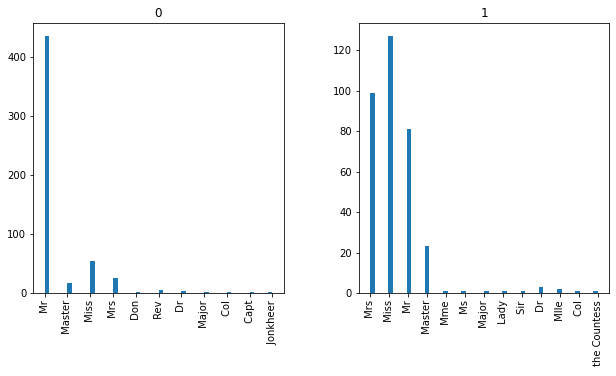

In [13]:
data.hist(column='Honorific',by='Survived', bins =50, figsize=(10,5))


### taking a quick look at the outcome (survived vs died)

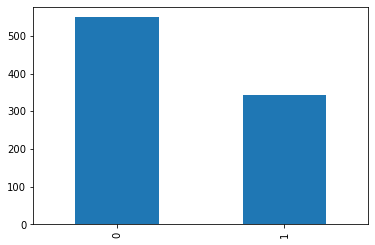

In [14]:
data['Survived'].value_counts().plot(kind='bar')

In [15]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### determining what types of honorifics used in dataset

In [16]:
from matplotlib import pyplot as plt

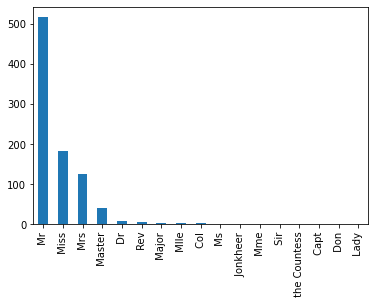

In [17]:
data['Honorific'].value_counts().plot(kind='bar')


In [18]:
data['Honorific'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Ms                1
 Jonkheer          1
 Mme               1
 Sir               1
 the Countess      1
 Capt              1
 Don               1
 Lady              1
Name: Honorific, dtype: int64

### some honorifics can be combined 

In [19]:
data.loc[data['Honorific']== ' Mme'] #Mrs
data.loc[data['Honorific']== ' Ms'] #Miss
data.loc[data['Honorific']== ' Mlle'] #Miss
data.loc[data['Honorific']== ' the Countess'] #Lady
data.loc[data['Honorific']== ' Jonkheer'] #Sir
data.loc[data['Honorific']== ' Major'] #Col
data.loc[data['Honorific']== ' Captain'] #Col
data.loc[data['Honorific']== ' Don'] #Sir

data.replace ({" Mme":" Mrs", " Ms":" Miss", " Mlle":" Miss"," the Countess":" Lady"," Jonkheer":" Sir"," Major":" Col",
              " Captain":" Col", " Don":" Sir",}, inplace= True)

In [20]:
data_test.replace ({" Mme":" Mrs", " Ms":" Miss", " Mlle":" Miss"," the Countess":" Lady"," Jonkheer":" Sir"," Major":" Col",
              " Captain":" Col", " Don":" Sir",}, inplace= True)

In [21]:
data['Honorific'].value_counts()

 Mr        517
 Miss      185
 Mrs       126
 Master     40
 Dr          7
 Rev         6
 Col         4
 Sir         3
 Lady        2
 Capt        1
Name: Honorific, dtype: int64

In [22]:
data_test['Honorific'].value_counts()

 Mr        228
 Miss      101
 Mrs        59
 Master     23
 Dr          3
 Rev         3
 Sir         1
Name: Honorific, dtype: int64

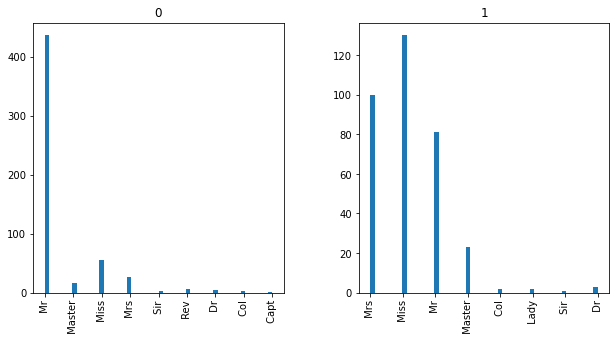

In [23]:
data.hist(column='Honorific',by='Survived', bins =50, figsize=(10,5))
plt.show()

### Looking at the cabins people were placed in

In [24]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
data['Cabin']= data['Cabin'].str[0] 
data_test ['Cabin']= data_test ['Cabin'].str[0]

### apart from nan data, analyzing to see if cabins had any relation on survival.

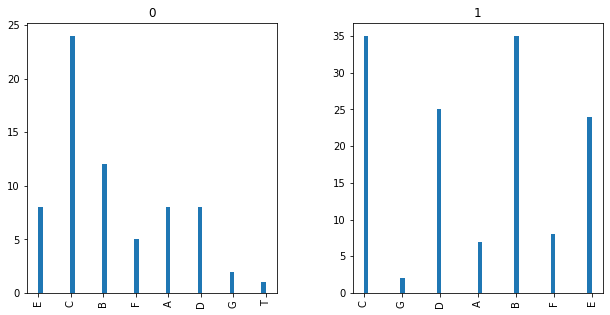

In [26]:
data.hist(column='Cabin',by='Survived', bins =50, figsize=(10,5))
plt.show()

In [27]:
data.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Cabin        687
Embarked       2
Honorific      0
dtype: int64

In [28]:
data_test.isna().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Cabin        327
Embarked       0
Honorific      0
dtype: int64

### nearly 80% of the data in 'Cabin' is missing for both the test and train set. We will drop that column

In [29]:
df = data.drop (columns = ['Cabin'])
df_test = data_test.drop (columns = ['Cabin'])

### Looking for null values in new dataframe

In [30]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
Honorific      0
dtype: int64

In [31]:
df_test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Embarked      0
Honorific     0
dtype: int64

### Going to use KNN imputer to fill nan values but first we have to encode the string data. sklearn encoders do not accept data with null values, so we have to first convert nan to string

In [32]:
df['Embarked'].fillna('NAN', inplace=True)

### encoding the string data

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [34]:
df.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Honorific     object
dtype: object

In [35]:
Honorific = df["Honorific"].to_numpy().reshape(-1,1)
Sex = df["Sex"].to_numpy().reshape(-1,1)
Embarked = df["Embarked"].to_numpy().reshape(-1,1)

In [36]:
Honorific = ohe.fit_transform(Honorific)
print ("Honorific", ohe.categories_)
Sex = ohe.fit_transform(Sex)
print ("Sex", ohe.categories_)
Embarked = ohe.fit_transform(Embarked)
print ("Embarked", ohe.categories_)

Honorific [array([' Capt', ' Col', ' Dr', ' Lady', ' Master', ' Miss', ' Mr', ' Mrs',
       ' Rev', ' Sir'], dtype=object)]
Sex [array(['female', 'male'], dtype=object)]
Embarked [array(['C', 'NAN', 'Q', 'S'], dtype=object)]


### Replacing 'NAN' string values back to null values and dropping the NAN columns for Columns: Embarked

In [37]:
for i in Embarked:
    if i[1] == 1.0:
        print (i)
        for j in range (len(i)):
            i[j] = np.nan
        print (i)

[0. 1. 0. 0.]
[nan nan nan nan]
[0. 1. 0. 0.]
[nan nan nan nan]


In [38]:
Emb = pd.DataFrame (Embarked, columns=['C', 'NAN', 'Q', 'S'])
Emb.loc[Emb['NAN'].isnull()== True]

,C,NAN,Q,S
61,NaN,NaN,NaN,NaN
829,NaN,NaN,NaN,NaN


In [39]:
Emb.drop(columns=['NAN'], inplace =True)
Emb.head(5)

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


### creating Dataframes from other two columns in order to combine with df dataframe

In [40]:
Honorific = pd.DataFrame (Honorific, columns = ['Capt', 'Col', 'Dr', 'Lady', 'Master', 'Miss', 'Mr', 'Mrs','Rev', 'Sir'])
Sex = pd.DataFrame (Sex, columns = ['female', 'male'])

In [41]:
df.drop (columns=['Embarked','Sex','Honorific'], inplace=True)
df = df.join(Emb)
df = df.join (Honorific)
df = df.join (Sex)

df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Capt,...,Dr,Lady,Master,Miss,Mr,Mrs,Rev,Sir,female,male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### using KNN imputer to fill null values, but first using sklearns minmax scaler to scale non-categorical data.

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
minmax =  MinMaxScaler()

In [43]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Capt,...,Dr,Lady,Master,Miss,Mr,Mrs,Rev,Sir,female,male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [44]:
df[['Age', 'Fare']] = pd.DataFrame(minmax.fit_transform(df[['Age', 'Fare']]), columns = [['Age', 'Fare']])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Capt,...,Dr,Lady,Master,Miss,Mr,Mrs,Rev,Sir,female,male
0,0,3,0.271174,1,0,0.014151,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.472229,1,0,0.139136,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,3,0.321438,0,0,0.015469,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.434531,1,0,0.103644,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,0.434531,0,0,0.015713,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [46]:
df.isnull().any().unique()

array([False])

### confirming imputer did its job by looking at a known data row with null values

In [47]:
df.loc[829,['C','Q','S']]

C    0.8
Q    0.0
S    0.2
Name: 829, dtype: float64

In [48]:
df.loc[829,['C','Q','S']]

C    0.8
Q    0.0
S    0.2
Name: 829, dtype: float64

### looks like Values need to be rounded. but first we will inverse transform the Age and Fare

In [49]:
df[['Age', 'Fare']] = pd.DataFrame(minmax.inverse_transform(df[['Age', 'Fare']]), columns = [['Age', 'Fare']])
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Capt,...,Dr,Lady,Master,Miss,Mr,Mrs,Rev,Sir,female,male
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [50]:
columns = ['Age','C','Q','S']

df[columns] = round (df[columns] )
df.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Capt,...,Dr,Lady,Master,Miss,Mr,Mrs,Rev,Sir,female,male
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [51]:
#checking if values were rounded
df.loc[829,['C','Q','S']]

C    1.0
Q    0.0
S    0.0
Name: 829, dtype: float64

In [52]:
df.columns.value_counts().sum()

21

### need to do the same for the test dataset. 1. one hot encode, 2. scale dataset, 3. Knn imputer to fill missing values

In [53]:
Honorific = df_test["Honorific"].to_numpy().reshape(-1,1)
Sex = df_test["Sex"].to_numpy().reshape(-1,1)
Embarked = df_test["Embarked"].to_numpy().reshape(-1,1)

Honorific = ohe.fit_transform(Honorific)
print ("Honorific", ohe.categories_)
Sex = ohe.fit_transform(Sex)
print ("Sex", ohe.categories_)
Embarked = ohe.fit_transform(Embarked)
print ("Embarked", ohe.categories_)



Honorific [array([' Dr', ' Master', ' Miss', ' Mr', ' Mrs', ' Rev', ' Sir'],
      dtype=object)]
Sex [array(['female', 'male'], dtype=object)]
Embarked [array(['C', 'Q', 'S'], dtype=object)]


In [54]:
Honorific = pd.DataFrame (Honorific, columns = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs','Rev', 'Sir'])
Sex = pd.DataFrame (Sex, columns = ['female', 'male'])
Emb = pd.DataFrame (Embarked, columns=['C', 'Q', 'S'])

In [55]:
df_test.drop (columns=['Embarked','Sex','Honorific'], inplace=True)
df_test = df_test.join(Emb)
df_test = df_test.join (Honorific)
df_test = df_test.join (Sex)

df_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Dr,Master,Miss,Mr,Mrs,Rev,Sir,female,male
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
df_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Dr',
       'Master', 'Miss', 'Mr', 'Mrs', 'Rev', 'Sir', 'female', 'male'],
      dtype='object')

In [57]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S',
       'Capt', 'Col', 'Dr', 'Lady', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev',
       'Sir', 'female', 'male'],
      dtype='object')

In [58]:
df_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Dr',
       'Master', 'Miss', 'Mr', 'Mrs', 'Rev', 'Sir', 'female', 'male'],
      dtype='object')

In [59]:
df_test['Capt']= 0.0
df_test['Col'] = 0.0
df_test['Lady'] = 0.0
df_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Dr,Master,Miss,Mr,Mrs,Rev,Sir,female,male,Capt,Col,Lady
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
df_test[['Age', 'Fare']] = pd.DataFrame(minmax.fit_transform(df_test[['Age', 'Fare']]), columns = [['Age', 'Fare']])
df_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Dr,Master,Miss,Mr,Mrs,Rev,Sir,female,male,Capt,Col,Lady
0,3,0.452723,0,0,0.015282,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,0.617566,1,0,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0.815377,0,0,0.018909,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
imputer = KNNImputer(n_neighbors=5)
df_test = pd.DataFrame(imputer.fit_transform(df_test),columns = df_test.columns)

In [62]:
df_test.isnull().any().unique()

array([False])

In [63]:
df_test[['Age', 'Fare']] = pd.DataFrame(minmax.inverse_transform(df_test[['Age', 'Fare']]), columns = [['Age', 'Fare']])
df_test['Age'] = round (df_test['Age'] )
df_test.head(4)


,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Dr,Master,Miss,Mr,Mrs,Rev,Sir,female,male,Capt,Col,Lady
0,3.0,34.0,0.0,0.0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
## we will use some feature selection techniques to see the best parameters.
from sklearn.feature_selection import SelectKBest, chi2

In [65]:
X = df.drop('Survived', axis = 1)
Y = df.Survived

features = SelectKBest(score_func = chi2, k =20 )
feat = pd.DataFrame (features.fit(X,Y).scores_, columns=['Score'])
column = pd.DataFrame (X.columns)
feat = feat.join (column)
feat.sort_values('Score',ascending =False)

,Score,0
4,4518.319091,Fare
18,170.348127,female
14,112.805785,Mr
19,92.702447,male
15,89.474177,Mrs
13,79.531749,Miss
1,62.769219,Age
0,30.873699,Pclass
5,22.009402,C
3,10.097499,Parch


### we will keep features up to SibSp, as these have some relevance


In [66]:
X = X[list (feat.nlargest(15,'Score')[0])]
X.head(5)

,Fare,female,Mr,male,Mrs,Miss,Age,Pclass,C,Parch,Master,S,Rev,Lady,SibSp
0,7.2500,0.0,1.0,1.0,0.0,0.0,22.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,71.2833,1.0,0.0,0.0,1.0,0.0,38.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.9250,1.0,0.0,0.0,0.0,1.0,26.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,53.1000,1.0,0.0,0.0,1.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,8.0500,0.0,1.0,1.0,0.0,0.0,35.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
df_test = df_test [X.columns]
df_test.head(5)

,Fare,female,Mr,male,Mrs,Miss,Age,Pclass,C,Parch,Master,S,Rev,Lady,SibSp
0,7.8292,0.0,1.0,1.0,0.0,0.0,34.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0000,1.0,0.0,0.0,1.0,0.0,47.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,9.6875,0.0,0.0,1.0,0.0,1.0,62.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.6625,0.0,0.0,1.0,1.0,0.0,27.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12.2875,1.0,1.0,0.0,0.0,0.0,22.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### we will use a few classification bagging and boosting ensemble algorithms 

In [68]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
KNN = BaggingClassifier(KNeighborsClassifier(),n_estimators=50)
RF = RandomForestClassifier()
SVM = BaggingClassifier(SVC(),n_estimators=50)
XGB = GradientBoostingClassifier()
Adaboost = AdaBoostClassifier()

## Since we know the data is not completely balanced in the Survivalibiliy, we will use StratifiedKFold method to split the data to ensure avoiding imablance in training/testing

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [70]:
kfold = StratifiedKFold (n_splits = 5)
n_scores = cross_val_score(KNN, X, Y, scoring='accuracy', cv=kfold, error_score='raise')
print('KNN_Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(RF, X, Y, scoring='accuracy', cv=kfold, error_score='raise')
print('RF_Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(SVM, X, Y, scoring='accuracy', cv=kfold, error_score='raise')
print('SVM_Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(XGB, X, Y, scoring='accuracy', cv=kfold, error_score='raise')
print('XGB_Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(Adaboost, X, Y, scoring='accuracy', cv=kfold, error_score='raise')
print('Adaboost_Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

KNN_Accuracy: 0.735 (0.045)
RF_Accuracy: 0.813 (0.035)
SVM_Accuracy: 0.669 (0.048)
XGB_Accuracy: 0.832 (0.024)
Adaboost_Accuracy: 0.820 (0.019)


In [71]:
### Making predictions on test data using XGB boost but first we will train the model classifier on all of the X data

In [76]:
XGB.fit(X,Y)
Survived = pd.DataFrame(XGB.predict(df_test),columns=['Survived'])
Submission = Passenger.join(Survived)
Submission.head(5)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0


In [77]:
out_path = r'C:\Users\Sharon & Floyd\Downloads\kaggle\Titanic_survivor\Titanic_Submission.xlsx'
writer = pd.ExcelWriter(out_path , engine='xlsxwriter', mode ='w')
Submission.to_excel(writer, sheet_name='Submission', index =False)
writer.save()
writer.close()